In [1]:
! pip install -q kaggle



In [2]:
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

Saving kaggle.json to kaggle.json
ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              233KB  2021-08-15 09:48:42          10662  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           6511  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           2455  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-07-03 18:37:20           2649  
promptcloud/careerbuilder-job-listing-2020

In [3]:
! kaggle competitions download -c house-prices-advanced-regression-techniques

  0% 0.00/441k [00:00<?, ?B/s]
100% 441k/441k [00:00<00:00, 65.9MB/s]
  0% 0.00/13.1k [00:00<?, ?B/s]
100% 13.1k/13.1k [00:00<00:00, 12.3MB/s]
  0% 0.00/31.2k [00:00<?, ?B/s]
100% 31.2k/31.2k [00:00<00:00, 31.9MB/s]
  0% 0.00/450k [00:00<?, ?B/s]
100% 450k/450k [00:00<00:00, 61.3MB/s]


In [4]:
! mkdir train
! unzip train.zip -d train

unzip:  cannot find or open train.zip, train.zip.zip or train.zip.ZIP.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

df = pd.read_csv('train.csv')
test = pd.read_csv("test.csv")

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
train = df.drop('Id',axis =1)


In [8]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
f = pd.DataFrame(train.isnull().sum())
f.head()

,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
Street,0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


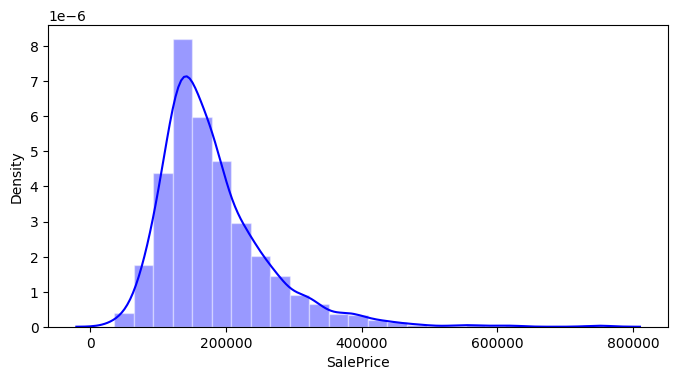

In [10]:
fig = plt.figure(figsize=(8,4),dpi=100)
sb.distplot(train["SalePrice"],bins=25,color='b',hist_kws=dict(edgecolor ='w',linewidth=1))
plt.show()

In [11]:
#checking nulll values
def null_val(data):
  nullval = data.isnull().sum()*100/len(train)
  nullval = nullval[nullval>0].sort_values()
  return (nullval)

In [12]:
null_values = null_val(train)

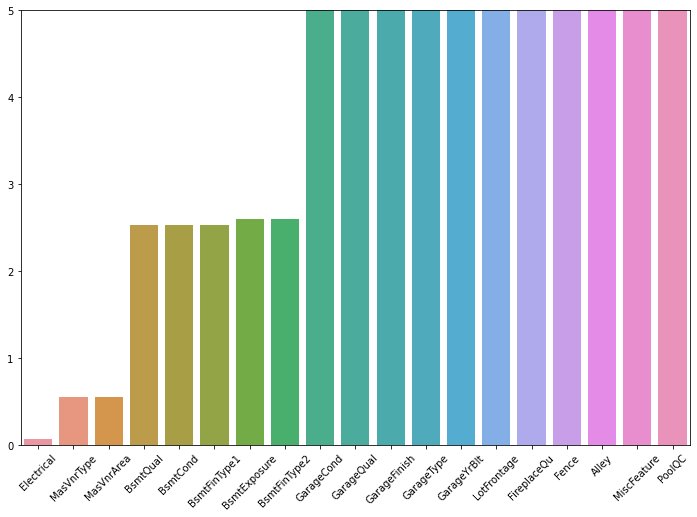

In [13]:
plt.figure(figsize=(12,8))
sb.barplot(x=null_values.index,y=null_values)
plt.xticks(rotation=45)
plt.ylim(0,5)
plt.show()

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

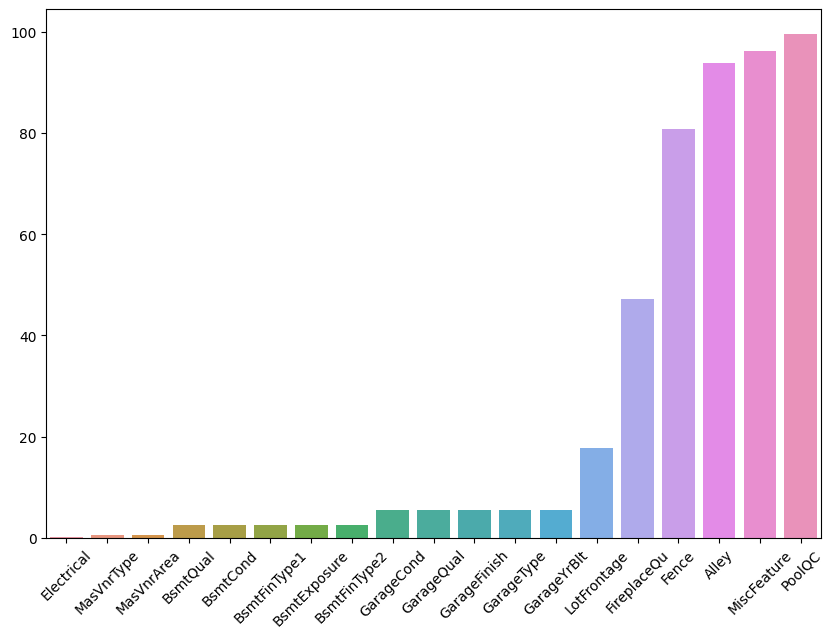

In [15]:
null_values = null_val(train)
plt.figure(figsize=(10,7),dpi=100)
sb.barplot(x = null_values.index,y=null_values)
plt.xticks(rotation = 45)
plt.show()

In [16]:
train['SalePrice'] = np.log1p(train['SalePrice'])
train = train.drop("Electrical",axis=1)

test = test.drop("Electrical",axis=1)

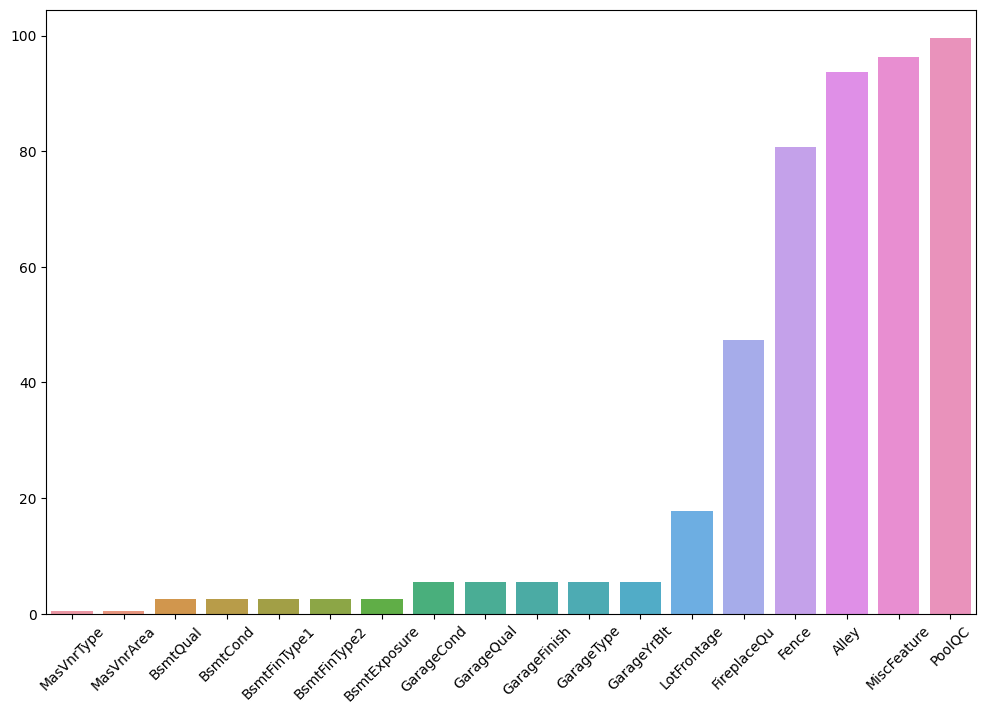

In [17]:
null_values = null_val(train)
plt.figure(figsize=(12,8),dpi=100)
sb.barplot(x = null_values.index,y=null_values)
plt.xticks(rotation = 45)
plt.show()

In [18]:
train["MasVnrType"]  = train["MasVnrType"].fillna("None") 
train["MasVnrArea"]  = train["MasVnrArea"].fillna(0) 
test["MasVnrType"]  = test["MasVnrType"].fillna("None") 
test["MasVnrArea"]  = test["MasVnrArea"].fillna(0) 

In [19]:
BSM =  ["BsmtQual", "BsmtCond" ,"BsmtExposure", "BsmtFinType1" ,"BsmtFinType2"] 
train[BSM] = train[BSM].fillna("None") 
test[BSM] = test[BSM].fillna("None") 

In [20]:
garageObj = ["GarageType","GarageFinish", "GarageQual","GarageCond"]
train["GarageYrBlt"] = train["GarageYrBlt"].fillna("0")
train[garageObj] = train[garageObj].fillna("None")   
test["GarageYrBlt"] = test["GarageYrBlt"].fillna("0")
test[garageObj] = test[garageObj].fillna("None")   

In [21]:
train.groupby("Neighborhood")["LotFrontage"].mean()

Neighborhood
Blmngtn    47.142857
Blueste    24.000000
BrDale     21.562500
BrkSide    57.509804
ClearCr    83.461538
CollgCr    71.682540
Crawfor    71.804878
Edwards    68.217391
Gilbert    79.877551
IDOTRR     62.500000
MeadowV    27.800000
Mitchel    70.083333
NAmes      76.462366
NPkVill    32.285714
NWAmes     81.288889
NoRidge    91.878788
NridgHt    81.881579
OldTown    62.788991
SWISU      58.913043
Sawyer     74.437500
SawyerW    71.500000
Somerst    64.666667
StoneBr    62.700000
Timber     80.133333
Veenker    59.714286
Name: LotFrontage, dtype: float64

In [22]:
train["LotFrontage"] = train.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.mean()))
test["LotFrontage"] = test.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.mean()))

In [23]:
train["FireplaceQu"] = train["FireplaceQu"].fillna("None")
test["FireplaceQu"] = test["FireplaceQu"].fillna("None")

In [24]:
train = train.drop(["Fence","Alley","MiscFeature","PoolQC"],axis = 1)
test = test.drop(["Fence","Alley","MiscFeature","PoolQC"],axis = 1)

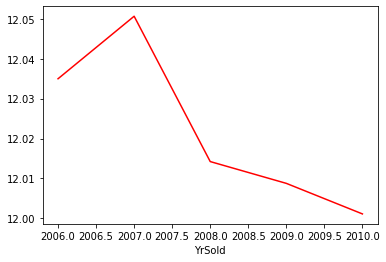

In [25]:
train.groupby("YrSold")["SalePrice"].mean().plot(color="r")

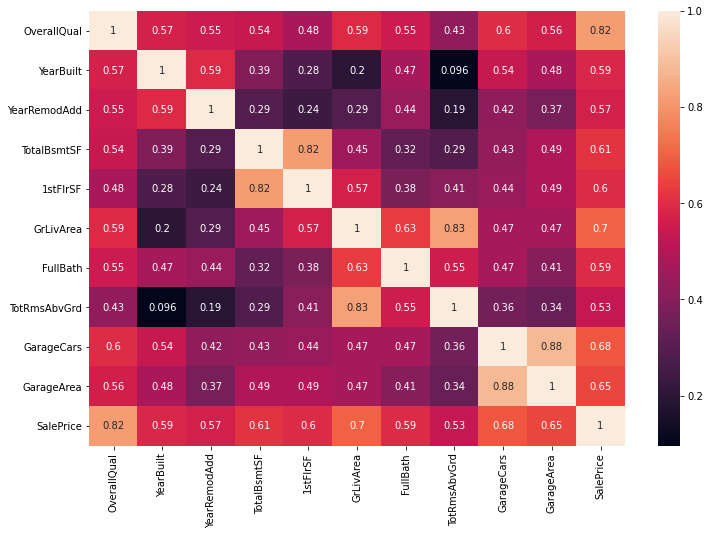

In [26]:
cor = train.corr()
top_Feature = cor.index[abs(cor["SalePrice"]>0.5)]
plt.subplots(figsize =(12,8))
top_corr = train[top_Feature].corr()
sb.heatmap(top_corr,annot=True)


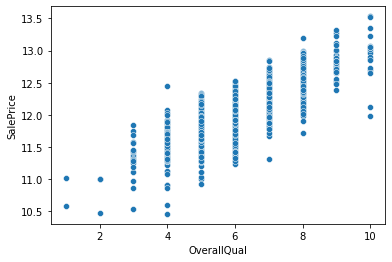

In [27]:
sb.scatterplot(data =train,x = train["OverallQual"],y=train["SalePrice"])

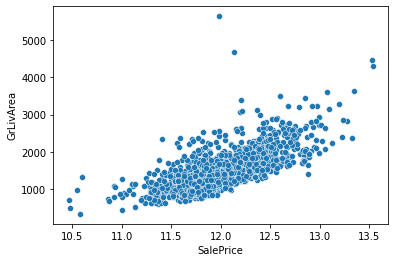

In [28]:
sb.scatterplot(data=train,y=train["GrLivArea"],x="SalePrice")

In [29]:
outliers = train[(train["SalePrice"]>11.5) & train["GrLivArea"]>4000].index
train = train.drop(outliers,axis=0)
train.shape


(1460, 75)

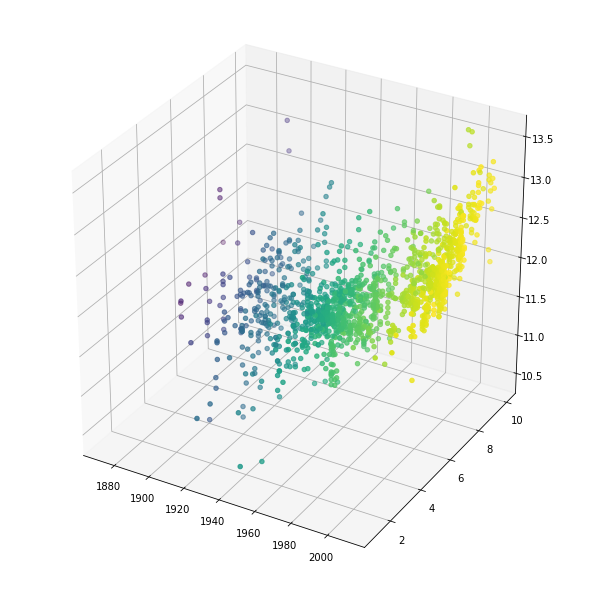

In [30]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)
x = train["YearBuilt"]
y = train["OverallQual"]
z = train["SalePrice"]
ax.scatter(x,y,z,c=x,marker='o')
plt.show()

In [31]:
train["MSSubClass"].apply(str)
train_num = train.select_dtypes(exclude="object")
train_obj = train.select_dtypes(include='object')
train_obj = pd.get_dummies(train_obj,drop_first=True)
Finaltrain = pd.concat([train_num,train_obj],axis=1)
Finaltrain.shape
test["MSSubClass"].apply(str)
train_num = test.select_dtypes(exclude="object")
train_obj = test.select_dtypes(include='object')
train_obj = pd.get_dummies(train_obj,drop_first=True)
test = pd.concat([train_num,train_obj],axis=1)
print(train.shape,test.shape)
test_sam = test.copy()

(1460, 75) (1459, 324)


In [32]:
Finaltrain = Finaltrain.drop(['Heating_GasA', 'Utilities_NoSeWa', 'GarageYrBlt_1931.0', 'RoofMatl_Membran', 'Condition2_RRAn', 'Heating_OthW', 'GarageYrBlt_1929.0', 'Condition2_RRNn', 'RoofMatl_Roll', 'GarageYrBlt_1908.0', 'RoofMatl_CompShg', 'RoofMatl_Metal', 'Exterior2nd_Other', 'Exterior1st_Stone', 'GarageYrBlt_1906.0', 'GarageQual_Fa', 'GarageYrBlt_1933.0', 'HouseStyle_2.5Fin', 'Exterior1st_ImStucc', 'GarageYrBlt_1914.0', 'Condition2_RRAe'],axis=1)
test = test.drop(['GarageYrBlt_1900.0', 'GarageYrBlt_1943.0', 'GarageYrBlt_2207.0', 'GarageYrBlt_1917.0', 'GarageYrBlt_1919.0', 'Id', 'GarageYrBlt_1896.0'],axis=1)

In [33]:
X,y = Finaltrain.drop("SalePrice",axis=1),Finaltrain["SalePrice"]

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=101)

In [35]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
Y_pred = model.predict(X_test)
from sklearn import metrics
MAD = metrics.mean_absolute_error(y_test,Y_pred)
print(MAD)
MSE = metrics.mean_squared_error(y_test,Y_pred)
RMSE = np.sqrt(MSE)

39.14807780828267


In [37]:
pd.DataFrame(model.coef_,X.columns,columns=["coeficient"])

,coeficient
MSSubClass,0.000108
LotFrontage,0.000564
LotArea,0.000003
OverallQual,0.046006
OverallCond,0.036906
...,...
SaleCondition_AdjLand,0.073592
SaleCondition_Alloca,0.059451
SaleCondition_Family,-0.015943
SaleCondition_Normal,0.089410


In [38]:
pd.DataFrame(data=[MAD,MSE,RMSE],index=["MAD","MSE","RMSE"],columns=["LinearRegression"])

,LinearRegression
MAD,39.148078
MSE,111305.321639
RMSE,333.624522


In [39]:
NullValues  = ["BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","GarageCars","GarageArea","BsmtFullBath","BsmtHalfBath"]
test[NullValues] = test[NullValues].fillna(0)

In [40]:
test_sam
full_test = model.predict(test)

full_test_result = pd.DataFrame(
    {
        'Id': test_sam['Id'],
        'SalePrice': np.exp(full_test),
    }
)
full_test_result.to_csv('submission.csv', index=False)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys


In [41]:
Finaltrain.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=318)